In [3]:
# Utilizamos el Drive en Colab para subir los datos a utilizar
# Se eliminan despues de cierto tiempo al subir directamente
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow

#Cargar Datos

En este caso se cargan los datos con la dirección en donde están alojados, cada uno por separado, debido a pruebas que se realizaron y carencia de tiempo.
Definimos la ruta en la que se encuentran mis datos, se define también un arreglo en el que e van a guardar las imágenes procesadas. Cada carpeta de imágenes se leen y extraen una por una, se le asigna el tamaño de 150px por 150px, luego se procede a ejecutar la función de normalización explicada anteriormente, finalmente, con los datos de la imagen resultante de este proceso se guarda en el arreglo definido como vacío anteriormente. Este proceso se lo realiza para todas las carpetas de imágenes y al final se imprimen los arreglos generados con su cantidad de datos en la carpeta, los pixeles definidos para el tamaño y, tomando en cuenta que se van a utilizar imágenes a color, se preenta el número 3 que representa a RGB.

#Aplicar algún método de ingeniería de características que sea adecuado:

Para este ejercicio se aplico un método de ingeniería de características conocido como *NORMALIZACIÓN* con el fin de escalar los valores de los pixeles en un rango de 0 a 1. Aplicamos las operaciones que se encuentran en la función *normalizar*, que pasamos por parámetro *image*, entonces, cuando se lea una imagen se realizará la siguiente operación, para obtener las imágenes en un rango de -1 a 1.

In [19]:
# SE CARGARÁ MANUALMENTE TODOS LOS DATOS
def cargarDatos(ruta):
  datos = []
  img_size = 164
  for img in os.listdir(ruta):
    img = cv2.imread(os.path.join(ruta, img))
    img_resize = cv2.resize(img,(img_size, img_size))
    # Se ejecuta la función para normalizar
    myimageNormalizada = img_resize /255
    datos.append(myimageNormalizada)
  return datos

# Cargar datos de CAT
datos = cargarDatos("/content/drive/MyDrive/datos_finales/Cat")
datosCat = np.array(datos)
print("CAT: {}".format(datosCat.shape))

# Cargar datos de CHICKEN
datos = cargarDatos("/content/drive/MyDrive/datos_finales/Chicken")
datosChicken = np.array(datos)
print("CHICKEN: {}".format(datosChicken.shape))

# Cargar datos de DOG
datos = cargarDatos("/content/drive/MyDrive/datos_finales/Dog")
datosDog = np.array(datos)
print("DOG: {}".format(datosDog.shape))

# Cargar datos de FISH
datos = cargarDatos("/content/drive/MyDrive/datos_finales/Fish")
datosFish = np.array(datos)
print("FISH: {}".format(datosFish.shape))

# Cargar datos de RABBIT
datos = cargarDatos("/content/drive/MyDrive/datos_finales/Rabbit")
datosRabbit = np.array(datos)
print("RABBIT: {}".format(datosRabbit.shape))

# Cargar datos de RAGNO (araña)
datos = cargarDatos("/content/drive/MyDrive/datos_finales/Ragno")
datosRagno = np.array(datos)
print("RAGNO: {}".format(datosRagno.shape))

CAT: (500, 164, 164, 3)
CHICKEN: (500, 164, 164, 3)
DOG: (500, 164, 164, 3)
FISH: (500, 164, 164, 3)
RABBIT: (500, 164, 164, 3)
RAGNO: (500, 164, 164, 3)


Como se puede observar, se obtuvieron los arreglos de cada una de las carpetas con las imágenes ya procesadas. Cumpliendo con lo establecido, Todas las imagenes se encuentran normalizadas y de un solo tamaño (150px * 150px) como se lo definió.

El primero número que se emuestra en el array, pertenece al número total de los datos, este no es necesario ya que el formato correcto y que se necesita es solo con los pixeles y el tipo de imagen (b/n = 1 ; color = 3), es decir, es necesario que no se muestre este número. Para esto, se utiliza **np.squeeze(imagen)** y se obtiene:

(164, 164, 3)


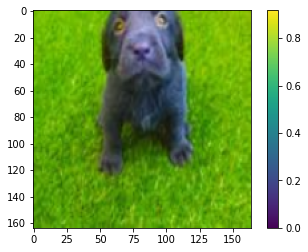

In [20]:
print(datosDog[4].shape)
plt.figure()
plt.imshow(np.squeeze(datosDog[4]))
plt.colorbar()
plt.grid(False)
plt.show()

#Concatenar Datos

In [21]:
# Concatenar todos los datos en una lista
total_imagenes = np.concatenate([datosCat,datosChicken,datosDog,datosFish, datosRabbit, datosRagno])
# Total de imágenes
print(len(total_imagenes))
# Convertir el total de imágenes en un arreglo (array)
Total_imagenes = np.array(total_imagenes)
# Mostrar
print(Total_imagenes.shape)

3000
(3000, 164, 164, 3)


#Asignar etiquetas manualmente

In [22]:
# ASIGNAR ETIQUETAS A LAS IMÁGENES
# repeat (clase , num de imágenes)
# Asignar etiquetas con repeat a CAT
etiquetas_cat = np.repeat(0, 500)

In [23]:
# Etiquetas para CHICKEN
etiquetas_chicken = np.repeat(1, 500)

In [24]:
# Etiquetas para DOG
etiquetas_dog = np.repeat(2, 500)

In [25]:
# Etiquetas para FISH
etiquetas_fish = np.repeat(3, 500)

In [26]:
# Etiquetas para RABBIT
etiquetas_rabbit = np.repeat(4, 500)

In [27]:
# Etiquetas para Ragno
etiquetas_ragno= np.repeat(5, 500)

#Nombre de las clases

In [28]:
class_names=['Cat','Chicken','Dog','Fish','Rabbit']

In [29]:
# Unir etiquetas en una sola lista
etiquetas = np.concatenate([etiquetas_cat, etiquetas_chicken, etiquetas_dog, 
                            etiquetas_fish, etiquetas_rabbit, etiquetas_ragno])
print(len(etiquetas))

# Convertimos a un array
Etiquetas = np.array(etiquetas)
print(Etiquetas.shape)

3000
(3000,)


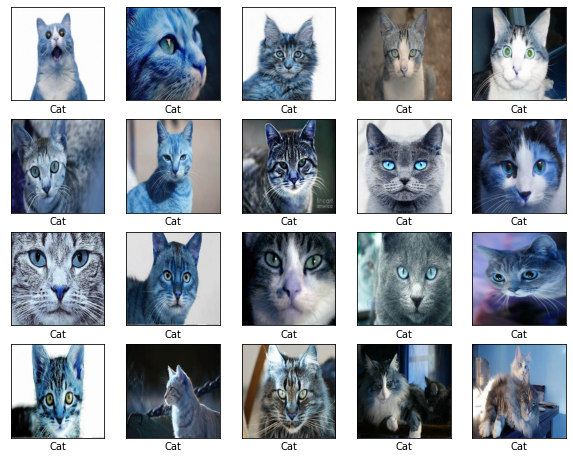

In [30]:
#Se imprimen algunas imagenes ya procesadas
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Total_imagenes[i])
  plt.xlabel(class_names[Etiquetas[i]])
plt.show()

#Definir "X" e "y"

In [31]:
X = Total_imagenes
y = Etiquetas
print(X.shape)
print(y.shape)

(3000, 164, 164, 3)
(3000,)


#Divir datos para el entrenamiento 70%, validación con un 20% y 20% para pruebas

In [32]:
# Divir datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
print("Entrenammiento: {}".format(X_train.shape, y_train.shape))
print("Pruebas: {}".format(X_test.shape, y_test.shape))

Entrenammiento: (2400, 164, 164, 3)
Pruebas: (600, 164, 164, 3)


In [33]:
# Divir los 2880 datos de entrenamiento en 75% para entrenammiento y 25% para validación
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.25)
print("Entrenammiento: {}".format(X_train.shape, y_train.shape))
print("Validación: {}".format(X_val.shape, y_val.shape))

Entrenammiento: (1800, 164, 164, 3)
Validación: (600, 164, 164, 3)


In [34]:
print("Entrenammiento: {}".format(X_train.shape, y_train.shape))
print("Pruebas: {}".format(X_test.shape, y_test.shape))
print("Validación: {}".format(X_val.shape, y_val.shape))

Entrenammiento: (1800, 164, 164, 3)
Pruebas: (600, 164, 164, 3)
Validación: (600, 164, 164, 3)


In [35]:
# Aplicación de one hot o codificación en caliente
# para los valores de destino
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

#Modelo

In [36]:
# Librerías para nuestro modelo

import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
import keras

In [37]:
# Definir función para el modelo
#modelo con capas convolucionales y Drop Out
def create_model(input_shape = (164,164,3)):
    model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.5),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.5),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(units = 54, activation = 'relu'),
    layers.Dense(units = 6, activation = 'softmax')])
    
    return model

In [38]:
def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [39]:
def fitting_model(model, X_train, y_train, epoch):
    model.fit(X_train,y_train, shuffle = True, epochs = epoch)

In [ ]:
#creating model
model = create_model((164,164,3))
#optimizing model
compile_model(model, 'adam', 'categorical_crossentropy')
#training model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 150, epochs = 100)
model.save("cnn_digitclass.model")


Epoch 1/100


In [ ]:
# Evaluar el modelo
_, acc = model.evaluate(X_val, y_val, verbose=0)
print('> %.3f' % (acc * 100.0))


In [ ]:
#model performance visualization
f = plt.figure(figsize=(20,8))

#accuracy
plt1 = f.add_subplot(121)
plt1.plot(history.history['accuracy'], label = str('Precisión entrenamiento'))
plt1.plot(history.history['val_accuracy'], label = str('Validación precisión'))
plt.legend()
plt.title('Precisión')

#loss
plt2 = f.add_subplot(122)
plt2.plot(history.history['loss'], label = str('Pérdida entrenamiento'))
plt2.plot(history.history['val_loss'], label = str('Validación pérdida'))
plt.legend()
plt.title('Pérdida')

plt.show()

In [ ]:
# Evaluar el modelo entrenado con los datos de pruebas
test_loss, test_accuracy = model.evaluate(
    X_test, steps = math.ceil(num_)
)